# Загрузка пакетов


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Пути к файлам

In [3]:
train_path = 'train.csv'
test_path = 'test.csv'
train_df = pd.read_csv(train_path)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


# Загрузка данных


Описание датасета:


Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры


In [4]:
test_df = pd.read_csv(test_path)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


# Проверяем на пустые значения

In [5]:
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

# Заменяем пусты значения на медиану и приводим типы

In [6]:
share_of_livingSquare =(train_df['LifeSquare'] / train_df['Square'])
train_df['LifeSquare'] = train_df['LifeSquare'].fillna((train_df['Square'] * share_of_livingSquare.median()))

In [7]:
train_df.replace({'Ecology_2': {'A':0, 'B':1}, 'Ecology_3': {'A':0, 'B':1}, 'Shops_2': {'A':0, 'B':1}}, inplace=True)
train_df             

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,29.603632,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


# Смотрим гистограммы на предмет выбросов



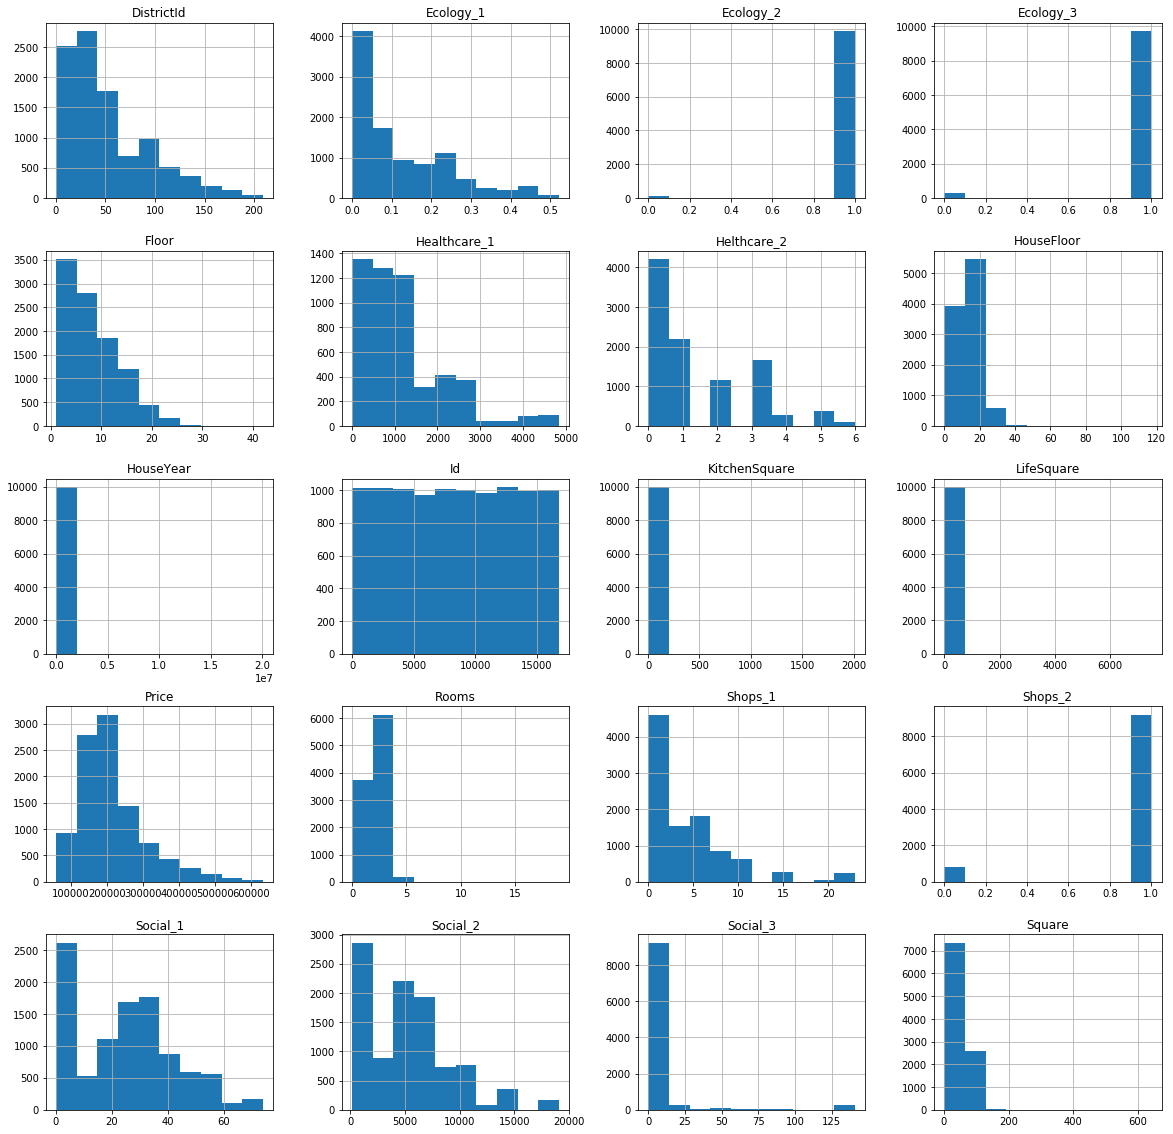

In [8]:
list_of_columns = list(train_df.columns)
train_df[list_of_columns].hist(
    figsize=(20,20)
)
plt.show()

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,10000.0,37.214382,76.862729,0.370619,24.239092,33.266172,44.872923,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


# Выбросы наглядно и их обрабтка

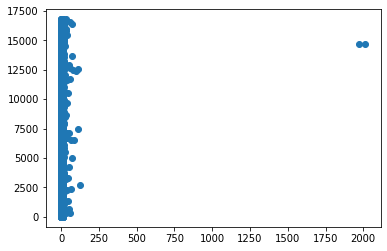

In [10]:
plt.scatter(train_df['KitchenSquare'], train_df['Id'])
plt.show()

In [12]:
median_of_param = train_df['KitchenSquare'].median()
train_df['KitchenSquare'].loc[train_df['KitchenSquare']>30] = median_of_param
train_df['KitchenSquare'].loc[train_df['KitchenSquare']<3] = median_of_param

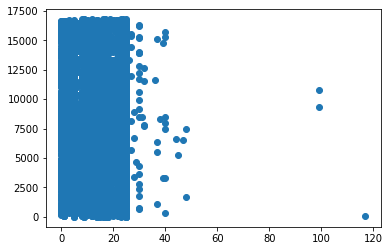

In [13]:
plt.scatter(train_df['HouseFloor'], train_df['Id'])
plt.show()

In [14]:
median_of_param = train_df['HouseFloor'].median()
train_df['HouseFloor'].loc[train_df['HouseFloor']>50] = median_of_param
train_df['HouseFloor'].loc[train_df['HouseFloor']<1] = median_of_param

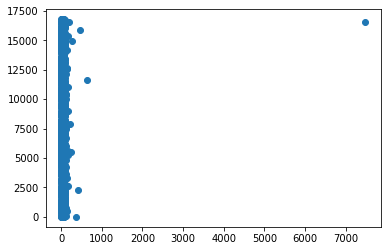

In [15]:
plt.scatter(train_df['LifeSquare'], train_df['Id'])
plt.show()

In [16]:
train_df['LifeSquare'].loc[train_df['LifeSquare']>280] = 280
train_df['LifeSquare'].loc[train_df['LifeSquare']<10] = 10

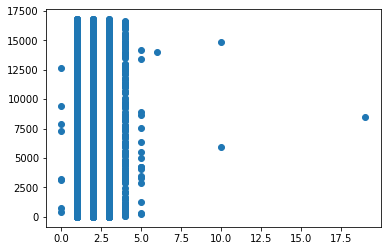

In [17]:
plt.scatter(train_df['Rooms'], train_df['Id'])
plt.show()

In [18]:
train_df['Rooms'].loc[train_df['Rooms']>5] = 5
train_df['Rooms'].loc[train_df['Rooms']<1] = 1

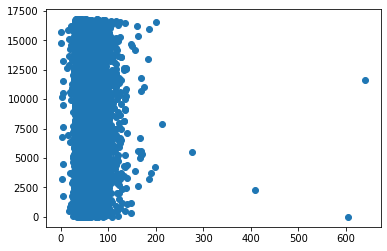

In [19]:
plt.scatter(train_df['Square'], train_df['Id'])
plt.show()

In [20]:
train_df['Square'].loc[train_df['Square']>300] = 300
train_df['Square'].loc[train_df['Square']<15] = 15

# Добавляем признаки: популярность района и цена за кв.м.

In [21]:
DistrictId_value_counts = dict(train_df['DistrictId'].value_counts())
train_df['DistrictId_counts'] = train_df['DistrictId'].map(DistrictId_value_counts)
train_df['DistrictId_counts'].fillna(train_df['DistrictId_counts'].median(), inplace=True)
mdp = train_df.groupby('DistrictId')[['Square', 'Price']].sum().reset_index()
mdp['unit_price'] = mdp['Price']/mdp['Square']
mdp=mdp[['DistrictId', 'unit_price']]
train_df=pd.merge(train_df, mdp, how='left', on='DistrictId')


# Делим выборку на валидационную и тренировочную

In [22]:
X_train,X_test,y_train,y_test = train_test_split(train_df.set_index('Id').drop(['Healthcare_1', 'Price'], axis= 'columns'), train_df['Price'], test_size=0.2, random_state=22)

# Обучаем модель и делаем прогноз


In [23]:
model_RFR = RandomForestRegressor(max_depth=12,n_estimators=200, random_state=31)
model_RFR.fit(X_train, y_train)
first_predict_train =model_RFR.predict(X_train) 
first_predict =model_RFR.predict(X_test) 
print(r2_score(y_train, first_predict_train))
print(r2_score(y_test, first_predict))

0.9224497466031942
0.7329920743120126


# Проводим те же операции на тестовых данных и делаем финальный прогноз

In [24]:
share_of_livingSquare =(test_df['LifeSquare'] / test_df['Square'])
test_df['LifeSquare'] = test_df['LifeSquare'].fillna((test_df['Square'] * share_of_livingSquare.median()))

In [25]:
test_df.replace({'Ecology_2': {'A':0, 'B':1}, 'Ecology_3': {'A':0, 'B':1}, 'Shops_2': {'A':0, 'B':1}}, inplace=True)

In [27]:
median_of_param = train_df['KitchenSquare'].median()

test_df['KitchenSquare'].loc[test_df['KitchenSquare']>30] = median_of_param
test_df['KitchenSquare'].loc[test_df['KitchenSquare']<3] = median_of_param
median_of_param = test_df['HouseFloor'].median()
test_df['HouseFloor'].loc[test_df['HouseFloor']>50] = median_of_param
test_df['HouseFloor'].loc[test_df['HouseFloor']<1] = median_of_param
median_of_param = test_df['LifeSquare'].median()
test_df['LifeSquare'].loc[test_df['LifeSquare']>280] = 280
test_df['LifeSquare'].loc[test_df['LifeSquare']<10] = 10
median_of_param = test_df['Rooms'].median()
test_df['Rooms'].loc[test_df['Rooms']>5] = 5
test_df['Rooms'].loc[test_df['Rooms']<1] = 1
median_of_param = test_df['Square'].median()
test_df['Square'].loc[test_df['Square']>300] = 300
test_df['Square'].loc[test_df['Square']<15] = 15

In [28]:
DistrictId_value_counts = dict(test_df['DistrictId'].value_counts())
test_df['DistrictId_counts'] = test_df['DistrictId'].map(DistrictId_value_counts)
test_df['DistrictId_counts'].fillna(test_df['DistrictId_counts'].median(), inplace=True)

test_df=pd.merge(test_df, mdp, how='left', on='DistrictId')
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictId_counts,unit_price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,11,2748,1,NaN,0,0,1,91,2957.990008
1,15856,74,2.0,69.263183,42.914875,6.0,6,1.0,1977,0.075779,...,1,6,1437,3,NaN,0,2,1,61,3272.322491
2,5480,190,1.0,15.000000,15.948246,12.0,2,5.0,1909,0.000000,...,1,30,7538,87,4702.0,5,5,1,2,7735.224377
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,1,23,4583,3,NaN,3,3,1,49,4063.439258
4,14275,27,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,...,1,2,629,1,NaN,0,0,0,391,2713.251017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,...,1,36,5992,0,NaN,1,1,1,45,3997.872947
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,...,1,1,264,0,NaN,0,1,1,344,3173.231123
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,...,1,74,19083,2,NaN,5,15,1,36,4061.853520
4998,4780,62,2.0,81.305222,50.376019,6.0,4,12.0,1977,0.072158,...,1,2,629,1,NaN,0,0,0,122,2676.756431


In [29]:
test_df.isna().sum()

Id                      0
DistrictId              0
Rooms                   0
Square                  0
LifeSquare              0
KitchenSquare           0
Floor                   0
HouseFloor              0
HouseYear               0
Ecology_1               0
Ecology_2               0
Ecology_3               0
Social_1                0
Social_2                0
Social_3                0
Healthcare_1         2377
Helthcare_2             0
Shops_1                 0
Shops_2                 0
DistrictId_counts       0
unit_price              8
dtype: int64

In [30]:
test_df['unit_price'] = test_df['unit_price'].fillna(test_df['unit_price'].median())

In [31]:
test_first_predict=model_RFR.predict(test_df.set_index('Id').drop(['Healthcare_1'], axis= 'columns'))

In [32]:
test_df['Price']=test_first_predict
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,DistrictId_counts,unit_price,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,11,2748,1,NaN,0,0,1,91,2957.990008,156718.167703
1,15856,74,2.0,69.263183,42.914875,6.0,6,1.0,1977,0.075779,...,6,1437,3,NaN,0,2,1,61,3272.322491,212307.526840
2,5480,190,1.0,15.000000,15.948246,12.0,2,5.0,1909,0.000000,...,30,7538,87,4702.0,5,5,1,2,7735.224377,288398.516616
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,23,4583,3,NaN,3,3,1,49,4063.439258,324203.597232
4,14275,27,1.0,47.527111,43.387569,6.0,17,17.0,2017,0.072158,...,2,629,1,NaN,0,0,0,391,2713.251017,143315.584707


# Выгружаем файл 

In [ ]:
test_df[['Id', 'Price']].to_csv('Badalov_predictions.csv', index=False)